In [1]:
# Load libraries
import moments
import matplotlib
import numpy as np
import pickle

In [2]:
# Load serialized data_dict object, which contains the same information as the VCF file, but formatted for moments
with open("/scratch/djb3ve/connor/data_dict.pickle", "rb") as f:
    data_dict = pickle.load(f)

In [12]:
# Load SFS from data
ns = [20, 20]
pop_ids = ["Daphnia.pulex.NorthAmerica", "Daphnia.pulex.Europe"]
fs_data = moments.Spectrum.from_data_dict(data_dict, pop_ids=pop_ids,
                                          projections=ns,
                                          polarized=False)

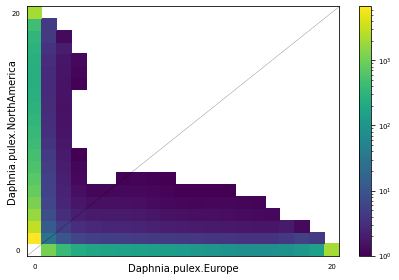

In [13]:
# Display SFS from data and save it as a CSV
moments.Plotting.plot_single_2d_sfs(fs_data, vmin = 1, cmap="viridis", out="fs_data")
np.savetxt("sfs_output/fs_data.csv", fs_data, delimiter=",")

In [14]:
# Create SFS from parameters that maximize likelihood function under split_mig model (according to moments)
params = [6.358476, 1.032427, 9.989897, 0.007727318]
fs_split_mig_model = moments.Demographics2D.split_mig(params, 
                                                      ns, 
                                                      pop_ids=pop_ids).fold()

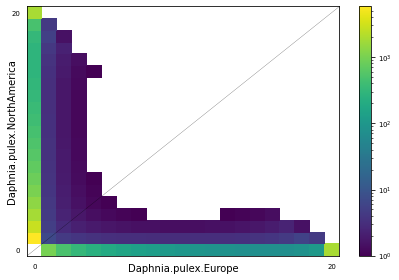

In [15]:
# Display the SFS estimated under the split_mig model and save it as a CSV
theta = moments.Inference.optimal_sfs_scaling(fs_split_mig_model, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_split_mig_model * theta, vmin = 1, cmap="viridis", out="fs_split_mig_model")
np.savetxt("sfs_output/fs_split_mig_model.csv", fs_split_mig_model * theta, delimiter=",")

In [16]:
# Create SFS from parameters that maximize likelihood function under split_no_mig model (according to moments)
params = [1.065988, 0.2213014, 0.8256301, 0]
fs_split_no_mig_model = moments.Demographics2D.split_mig(params, 
                                                         ns, 
                                                         pop_ids=pop_ids).fold()

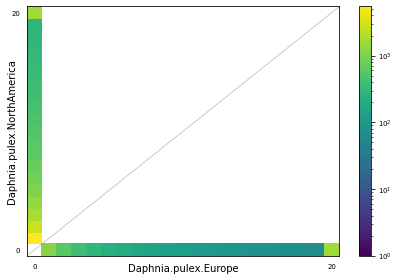

In [17]:
# Display the SFS estimated under the split_no_mig model and save it as a CSV
theta = moments.Inference.optimal_sfs_scaling(fs_split_no_mig_model, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_split_no_mig_model * theta, vmin=1, cmap="viridis", out="fs_split_no_mig_model")
np.savetxt("sfs_output/fs_split_no_mig_model.csv", fs_split_no_mig_model * theta, delimiter=",")

In [11]:
# Plugging estimates of population sizes and splitting times (not calculated with demographic inference) into split_no_mig model.
# I AM NOT SURE IF THIS IS IMPLEMENTED CORRECTLY.
params = [700000, 200000, 1000000/2, 0]
fs_true = moments.Demographics2D.split_mig(params, 
                                           ns, 
                                           pop_ids=pop_ids).fold()

In [60]:
# The log-likelihood of this SFS is poor compared to the maxima of the likelihoods under the split_mig and split_no_mig models (-685 and -1423, respectively) 
moments.Inference.ll_multinom(fs_true, fs_data)

-11703.929249771903

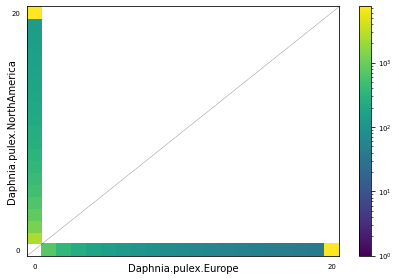

In [48]:
# Display the SFS
theta = moments.Inference.optimal_sfs_scaling(fs_true, fs_data)
moments.Plotting.plot_single_2d_sfs(fs_true * theta, vmin=1, cmap="viridis", out="fs_split_no_mig_model")

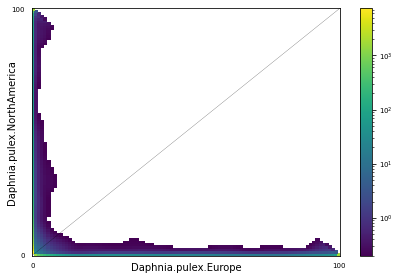

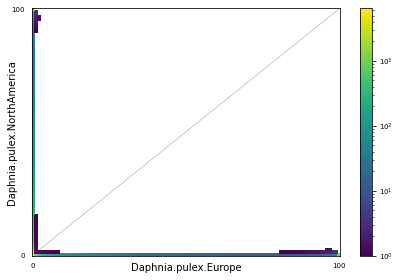

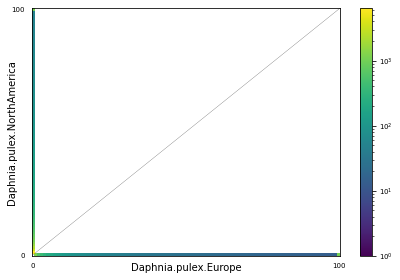

In [11]:
ns = [100, 100]
pop_ids = ["Daphnia.pulex.NorthAmerica", "Daphnia.pulex.Europe"]
fs_data_100 = moments.Spectrum.from_data_dict(data_dict, pop_ids=pop_ids,
                                          projections=ns,
                                          polarized=False)

moments.Plotting.plot_single_2d_sfs(fs_data_100, vmin=0.1, cmap="viridis", out="fs_data_100")
np.savetxt("sfs_output/fs_data_100.csv", fs_data_100, delimiter=",")

params = [7.068884, 1.148476, 9.974259, 0.007646469]
fs_split_mig_model_100 = moments.Demographics2D.split_mig(params, 
                                                      ns, 
                                                      pop_ids=pop_ids).fold()

theta = moments.Inference.optimal_sfs_scaling(fs_split_mig_model_100, fs_data_100)
moments.Plotting.plot_single_2d_sfs(fs_split_mig_model_100 * theta, vmin = 0.1, cmap="viridis", out="fs_split_mig_model_100")
np.savetxt("sfs_output/fs_split_mig_model_100.csv", fs_split_mig_model_100 * theta, delimiter=",")

params = [1.217047, 0.2206743, 0.6808528, 0]
fs_split_no_mig_model_100 = moments.Demographics2D.split_mig(params, 
                                                         ns, 
                                                         pop_ids=pop_ids).fold()

theta = moments.Inference.optimal_sfs_scaling(fs_split_no_mig_model_100, fs_data_100)
moments.Plotting.plot_single_2d_sfs(fs_split_no_mig_model_100 * theta, vmin=0.1, cmap="viridis", out="fs_split_no_mig_model_100")
np.savetxt("sfs_output/fs_split_no_mig_model_100.csv", fs_split_no_mig_model_100 * theta, delimiter=",")